### Need Package Import


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FuncFormatter
import ipywidgets as widgets
from IPython.display import display


In [35]:
df = pd.read_csv("Dataset\laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Analysis Dataset Column information & Values type


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [37]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [38]:
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Drop Unwanted columns

### change Column rount price


In [39]:
df.drop(df.columns[0], axis=1, inplace=True)
df["Price"] = df["Price"].round(2)


df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.52
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.34
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.81


### Columns Datatype Cleaning

In [40]:

# print(df["Ram"].unique())
# print(df["Weight"].unique())

# Strip any leading/trailing spaces from column names
df["Ram"] = df["Ram"].str.replace("GB","").astype(int)
df["Weight"] = df["Weight"].str.replace("kg","").astype(float)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81


In [41]:
print(sorted(df["Company"].unique()))

['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi']


In [42]:
print(len(df))

1303


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10372\3654968807.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x="Label", y="Price_K", palette="Set2")


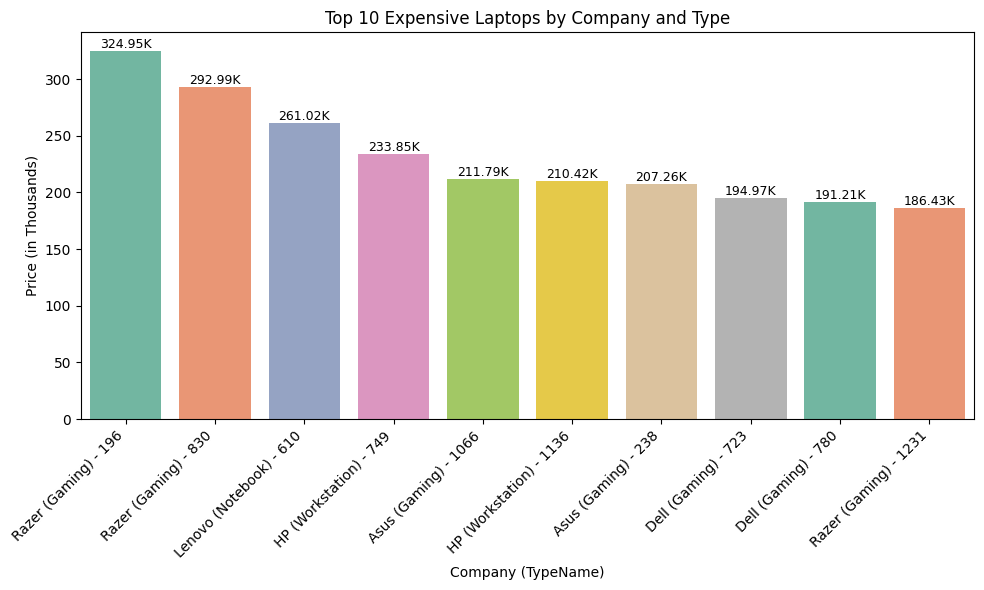

In [43]:
# Get top 10 most expensive laptops
top_10 = df.sort_values(by="Price", ascending=False).head(10).copy()
top_10["Price_K"] = (top_10["Price"] / 1000).round(2)

# Create unique label using Company + TypeName + Model index
top_10["Label"] = (
    top_10["Company"] + " (" + top_10["TypeName"] + ") - " + top_10.index.astype(str)
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10, x="Label", y="Price_K", palette="Set2")

# Add bar labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}K",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.title("Top 10 Expensive Laptops by Company and Type")
plt.xlabel("Company (TypeName)")
plt.ylabel("Price (in Thousands)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)  
df.head()

,Inches,Ram,Weight,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_IPS Panel 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080,ScreenResolution_IPS Panel Full HD 1366x768,ScreenResolution_IPS Panel Full HD 1920x1080,ScreenResolution_IPS Panel Full HD 1920x1200,ScreenResolution_IPS Panel Full HD 2160x1440,ScreenResolution_IPS Panel Full HD 2560x1440,ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800,ScreenResolution_IPS Panel Quad HD+ 2560x1440,ScreenResolution_IPS Panel Quad HD+ 3200x1800,ScreenResolution_IPS Panel Retina Display 2304x1440,ScreenResolution_IPS Panel Retina Display 2560x1600,ScreenResolution_IPS Panel Retina Display 2736x1824,ScreenResolution_IPS Panel Retina Display 2880x1800,ScreenResolution_IPS Panel Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Touchscreen 1366x768,ScreenResolution_IPS Panel Touchscreen 1920x1200,ScreenResolution_IPS Panel Touchscreen 2400x1600,ScreenResolution_IPS Panel Touchscreen 2560x1440,ScreenResolution_Quad HD+ / Touchscreen 3200x1800,ScreenResolution_Quad HD+ 3200x1800,ScreenResolution_Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_Touchscreen / Full HD 1920x1080,ScreenResolution_Touchscreen / Quad HD+ 3200x1800,ScreenResolution_Touchscreen 1366x768,ScreenResolution_Touchscreen 2256x1504,ScreenResolution_Touchscreen 2400x1600,ScreenResolution_Touchscreen 2560x1440,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GHz,Cpu_Intel Co

In [ ]:
# Apply one-hot encoding to categorical variables before dropping the target variable
df = pd.get_dummies(df, columns=['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'], drop_first=True)

# Define independent and dependent variables
X = df.drop(columns=["Price"])
Y = df["Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Absolute Error: 10323.694065274269
R² Score: 0.8437407292100991


In [58]:

# Create widgets for user input
company_widget = widgets.Dropdown(
    options=[col.replace('Company_', '') for col in df.columns if col.startswith('Company_')],
    description='Company:',
)

type_widget = widgets.Dropdown(
    options=[col.replace('TypeName_', '') for col in df.columns if col.startswith('TypeName_')],
    description='Type:',
)

resolution_widget = widgets.Dropdown(
    options=[col.replace('ScreenResolution_', '') for col in df.columns if col.startswith('ScreenResolution_')],
    description='Resolution:',
)

cpu_widget = widgets.Dropdown(
    options=[col.replace('Cpu_', '') for col in df.columns if col.startswith('Cpu_')],
    description='CPU:',
)

inches_widget = widgets.FloatSlider(
    value=1,
    min=10.1,
    max=18.4,
    step=1,
    description='Inches:',
)

ram_widget = widgets.IntSlider(
    value=32,
    min=4,
    max=128,
    step=4,
    description='RAM (GB):',
)

weight_widget = widgets.FloatSlider(
    value=3.0,
    min=1.0,
    max=5.0,
    step=0.1,
    description='Weight (kg):',
)

def predict_price(company, type_name, resolution, cpu, inches, ram, weight):
    # Create the input data dictionary
    input_data = {
        'Company_' + company: 1,
        'TypeName_' + type_name: 1,
        'ScreenResolution_' + resolution: 1,
        'Cpu_' + cpu: 1,
        'Inches': inches,
        'Ram': ram,
        'Weight': weight
    }
    
    # Add zeros for other dummy variables
    for col in df.columns:
        if col not in input_data and col != 'Price':  # Exclude 'Price' from input
            input_data[col] = 0
            
    input_df = pd.DataFrame([input_data])
    
    # Ensure the input DataFrame has the same columns as the model was trained on
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    
    predicted_price = model.predict(input_df)
    print(f"Predicted Price: {predicted_price[0]:,.2f}")

# Create a button to trigger the prediction
predict_button = widgets.Button(description="Predict Price")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        predict_price(company_widget.value, 
                      type_widget.value, 
                      resolution_widget.value, 
                      cpu_widget.value, 
                      inches_widget.value,
                      ram_widget.value, 
                      weight_widget.value)

predict_button.on_click(on_button_click)

# Display the widgets and output
display(company_widget, type_widget, resolution_widget, cpu_widget, inches_widget ,ram_widget, weight_widget, predict_button, output)

Dropdown(description='Company:', options=('Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei…

Dropdown(description='Type:', options=('Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation'), value='Ga…

Dropdown(description='Resolution:', options=('1440x900', '1600x900', '1920x1080', '2560x1440', '4K Ultra HD / …

Dropdown(description='CPU:', options=('AMD A10-Series 9620P 2.5GHz', 'AMD A10-Series A10-9620P 2.5GHz', 'AMD A…

FloatSlider(value=10.1, description='Inches:', max=18.4, min=10.1, step=1.0)

IntSlider(value=32, description='RAM (GB):', max=128, min=4, step=4)

FloatSlider(value=3.0, description='Weight (kg):', max=5.0, min=1.0)

Button(description='Predict Price', style=ButtonStyle())

Output()

In [47]:
Inches = df["Inches"].unique()
regular_floats = [float(value) for value in sorted(Inches, reverse=False)]
# Print the result
print(regular_floats)

[10.1, 11.3, 11.6, 12.0, 12.3, 12.5, 13.0, 13.3, 13.5, 13.9, 14.0, 14.1, 15.0, 15.4, 15.6, 17.0, 17.3, 18.4]
